# C. Periodicidad de las Manchas Solares
En el archivo adjunto llamado ’ManchasSolares.txt’ contiene un conjunto de datos con dos columnas: la primera cuenta los meses iniciando en enero de 1749 y la segunda contiene el número de manchas solares mensuales observadas.

---
1. Escriba un programa que lea el conjunto de datos y grafique la información contenida. El número de manchas es un indicador de actividad solar. Con ayuda de este gráfico, intente estimar el periodo del ciclo de actividad solar en meses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ##seaborn: statistical data visualization https://seaborn.pydata.org/
from scipy.fft import fft, ifft

from google.colab import drive #Importar los datos de csv a colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Archivo importada a data frames de panda Pater
data = pd.read_csv('/content/drive/MyDrive/CosasPater/UNAL/202202SeptimoSemestre/AstrofisicaCom/Taller3/ManchasSolares.txt',sep='	')
data

,Meses,número de manchas
0,0,58.0
1,1,62.6
2,2,70.0
3,3,55.7
4,4,85.0
...,...,...
3138,3138,16.1
3139,3139,19.6
3140,3140,25.2
3141,3141,23.5


In [2]:
#Archivo importada a data frames de panda Laura
data = pd.read_csv('/content/drive/MyDrive/2022-2/Astrofísica computacional :3/Taller 3/ManchasSolares.txt',sep='	')
data

,Meses,número de manchas
0,0,58.0
1,1,62.6
2,2,70.0
3,3,55.7
4,4,85.0
...,...,...
3138,3138,16.1
3139,3139,19.6
3140,3140,25.2
3141,3141,23.5


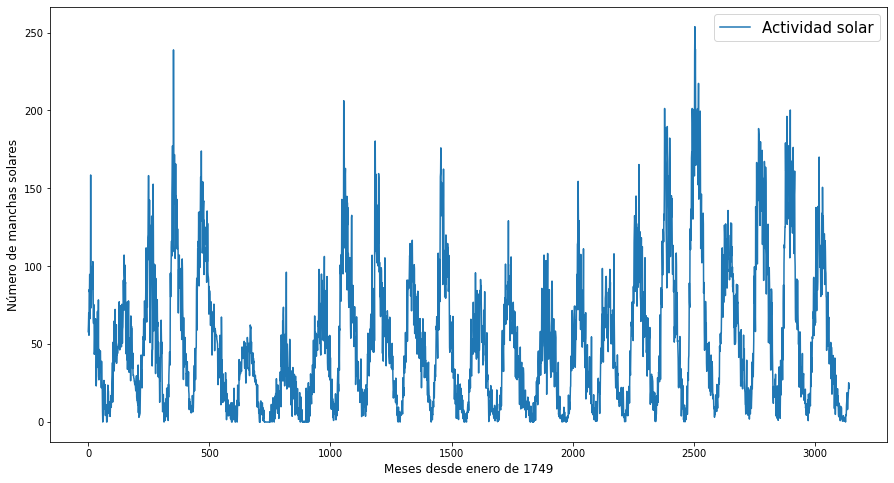

In [3]:
#Separación de los datos
X=data[['Meses']]
Y=data[['número de manchas']]

#Grafico
plt.figure(figsize=(15,8))
plt.plot(X,Y,label="Actividad solar")
plt.legend(fontsize=15)
plt.xlabel('Meses desde enero de 1749',fontsize=12)
plt.ylabel('Número de manchas solares',fontsize=12)
plt.show()


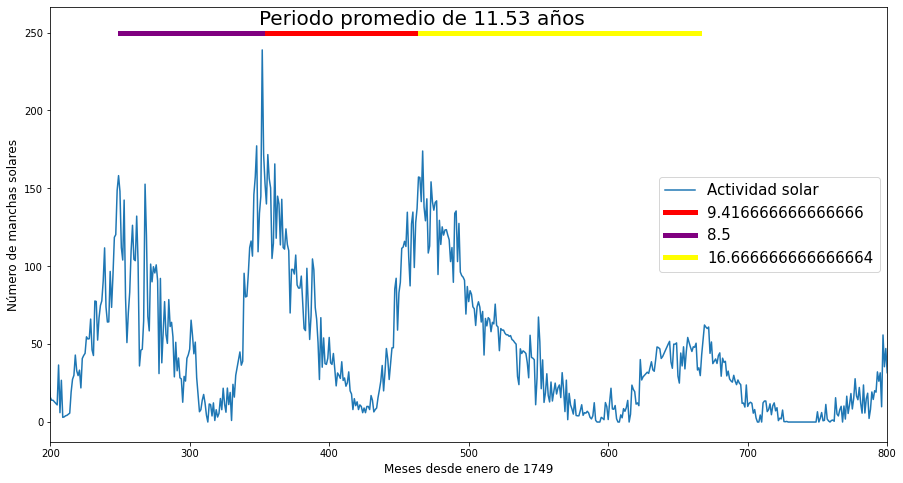

In [4]:
#Periodo por promedio
plt.figure(figsize=(15,8))
plt.plot(X,Y,label="Actividad solar")
plt.plot([352,465],[250,250],color='red',linewidth=5,label=(465-352)*(1/12))
plt.plot([250,352],[250,250],color='purple',linewidth=5,label=(352-250)*(1/12))
plt.plot([465,665],[250,250],color='yellow',linewidth=5,label=(665-465)*(1/12))
plt.legend(fontsize=15)
plt.xlabel('Meses desde enero de 1749',fontsize=12)
plt.ylabel('Número de manchas solares',fontsize=12)
plt.xlim(200,800)
txt = 'Periodo promedio de 11.53 años'
plt.text(350, 255,'Periodo promedio de 11.53 años' , fontsize=20, color='k')
plt.show()

---
2. Escriba una función que calcule la Transformada Discreta de Fourier (DFT) de los datos leidos y realice un gráfico de la magnitud de los coeficientes de Fourier $|c_{k}|^{2}$ contra el número $k$. Este gráfico se denomina Espectro de Potencias de la señal de manchas solares. Identifique el máximo en el gráfico, el cual corresponde a la frecuencia que presenta la mayor amplitud dentro de la serie de Fourier.

3143


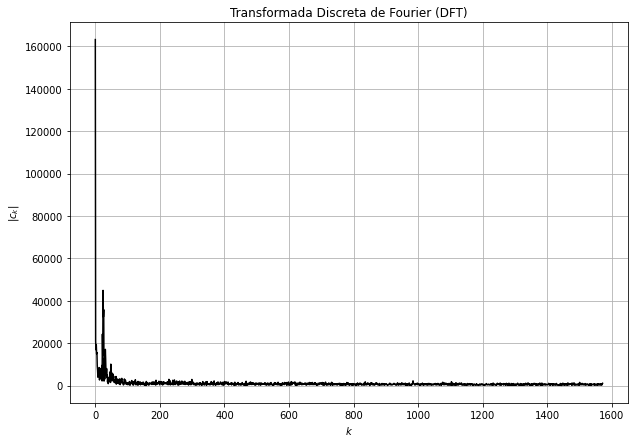

In [5]:
n = len(data) #Número total de datos
print(n)
Y=np.array(Y)
c = np.zeros((n+1)//2, complex) #Teniendo en cuenta que tenemos n impar
for k in range(0,(n+1)//2):
  for i in range(0,n):
    c[k] += Y[i]*np.exp(-2j*np.pi*k*i/n) 

plt.figure(figsize=(10,7))
plt.plot(range(len(c)), abs(c), color='black')
plt.xlabel(r'$k$')
plt.ylabel(r'$\left| c_k \right|$')
plt.title(r'Transformada Discreta de Fourier (DFT)')
plt.grid()
plt.show()

[2.66338157e+10 4.38551689e+08 2.84356855e+08 ... 1.89583208e+05
 7.46220529e+05 1.14646920e+06]


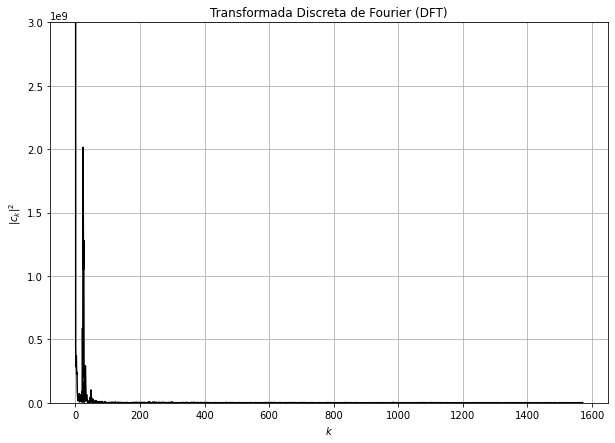

In [6]:
#Con |c_k|²
b=abs(c*c.conjugate())
print(b)

plt.figure(figsize=(10,7))
plt.plot(range(len(b)), b, color='black')
plt.xlabel(r'$k$')
plt.ylabel(r'$\left| c_k \right|^2$')
plt.ylim(0,3*10**9)
plt.title(r'Transformada Discreta de Fourier (DFT)')
plt.grid()
plt.show()

In [7]:
#El máximo de la función se encuentra en
data_2=np.zeros((1572,0))
data2=pd.DataFrame(data_2)
data2['k'] = range(len(b))
data2['Coeficientes'] = b
Intervalo1 = data2[data2['Coeficientes'] > 1.5e9]
Intervalo2 = Intervalo1[Intervalo1['Coeficientes'] < 2.5e9]
Intervalo2

,k,Coeficientes
24,24,2.014337e+09


---
3. Encuente el valor de $k$ correspondiente al máximo y determine el periodo correspondiente a esta frecuencia. El periodo hallado debe ser similar al que estimó a partir de la gráfica de los datos originales.

In [8]:
#Obtención del k par el cual tenemos la frecuencia principal
K=np.array(Intervalo2)
X=np.array(X)
k=K[0,0]

#Obtención de la frecunecia y el periodo
n=len(X)                 #Número de datos 
dT=X[1]-X[0]
dt=dT[0]                 #Intervalo entre datos 
frq=2*np.pi/((n+1)/2*k)  #Definimos la frecuencia como el K dividido la longitud total del intervalo de los datos
frq=(1/(dt*n)) * k
T=1/frq 
print('El periodo de la actividad solar será de',T,'meses, es decir,',T/12,'años')

El periodo de la actividad solar será de 130.95833333333334 meses, es decir, 10.913194444444445 años


---
4. Repita el mismo procedimiento utilizando la Transformada Rápida de Fourier FFT (recomiedo que no cree la función sino que utilice una de las implementaciones de la FFT incorporadas en su lenguaje de programación de preferencia).

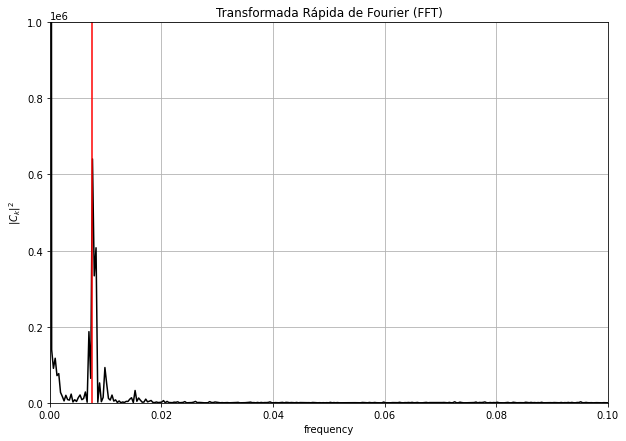

In [9]:
#Importación de los datos
X=data[['Meses']]
Y=data[['número de manchas']]
X=np.array(X)
Y=np.array(Y)

Y1=[]
for i in range(len(Y)):
  y=Y[i]
  Y1.append(y[0])  

n = len(X)
c = np.fft.fft(Y1) #Función de numpy fft
dT = X[1] - X[0]
dt=dT[0]
psd = c*np.conj(c)/n
freq = (1/(dt*n)) * np.arange(n) 
Psd=[]
for i in range(len(psd)):
  p=abs(psd[i])
  Psd.append(p)

plt.figure(figsize=(10,7))
plt.plot(freq, Psd, color='black')
plt.xlabel(r'frequency')
plt.ylabel(r'$\left| C_k \right|^2$')
plt.title(r'Transformada Rápida de Fourier (FFT)')
plt.plot([0.00763,0.00763],[0,1*10**6],color='red') #Frecuencia asociado al coeficiente máximo encontrado por DFT
plt.xlim(0,0.1)
plt.ylim(0,1*10**6)
plt.grid()
plt.show()